In [ ]:
#Perform the following operations using R/Python on the data sets:
#a) Compute and display summary statistics for each feature available in the dataset. (e.g. minimum value, maximum value, mean, range, standard deviation, variance and percentiles
#b) Data Visualization-Create a histogram for each feature in the dataset to illustrate the feature distributions.
#c) Data cleaning, Data integration, Data transformation, Data model building (e.g. Classification)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
ds = pd.read_csv("admission - admission.csv")

In [3]:
ds.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
ds.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


(array([ 6., 25., 43., 64.,  0., 80., 88., 89., 63., 42.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

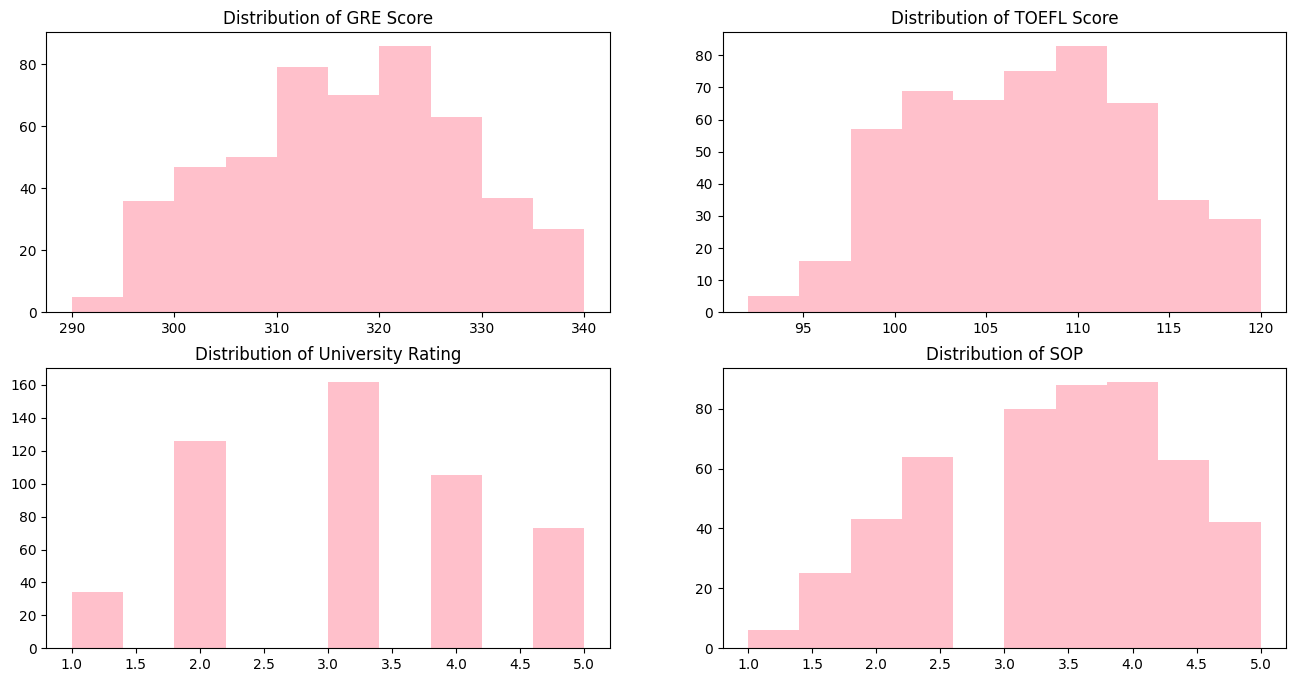

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(16,8))
axes[0,0].set_title("Distribution of GRE Score")
axes[0,0].hist(ds["GRE Score"], color="pink")

axes[0,1].set_title("Distribution of TOEFL Score")
axes[0,1].hist(ds["TOEFL Score"], color="pink")

axes[1,0].set_title("Distribution of University Rating")
axes[1,0].hist(ds["University Rating"], color="pink")

axes[1,1].set_title("Distribution of SOP")
axes[1,1].hist(ds["SOP"], color="pink")

In [6]:
ds.isnull()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False


In [7]:
ds.fillna(ds.mean(), inplace = True)

In [8]:
ds.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
X = ds[["GRE Score", "TOEFL Score", "University Rating", "SOP", "CGPA"]]
y = ds["Research"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [11]:
regressor = LinearRegression()

In [12]:
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = regressor.predict(X_test)

In [14]:
print("Mean absolute error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean squared error: ", metrics.mean_squared_error(y_test, y_pred))
print("R2 score: ", metrics.r2_score(y_test, y_pred))

Mean absolute error:  0.3548724169479488
Mean squared error:  0.18125815357347205
R2 score:  0.2578200603811581
